In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [9]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_fold1_15AB_15AB_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [10]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold1_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.181120,0.194467,0.065747,-0.200114,0.398752,0.114303,-0.103000,-0.016540,0.102576,-0.202434,...,0.066100,-0.131100,-0.026164,-0.133928,0.020244,0.144070,Abnormal,P1,FP-A,AB01
1,-0.141929,0.767942,0.015837,-0.167265,-0.010650,-0.091303,-0.189186,-0.002376,-0.194050,-0.225473,...,0.214231,-0.112294,-0.140712,-0.160144,0.290251,-0.042569,Abnormal,P2,FP-A,AB01
2,-0.136205,0.375301,0.024501,-0.169118,0.188094,0.124289,0.306466,-0.142607,-0.031881,-0.229348,...,0.365782,-0.176397,-0.137170,-0.115272,0.477938,-0.131492,Abnormal,P41,FP-B,AB01
3,-0.203376,0.137031,-0.056856,-0.158518,0.074823,0.093772,0.341434,-0.197681,-0.099953,-0.167008,...,0.357039,-0.163077,-0.142476,-0.036411,0.293755,0.015929,Abnormal,P51,FP-C,AB01
4,-0.113947,-0.027000,0.541034,-0.152878,-0.085632,-0.049186,-0.028539,-0.128159,-0.173086,-0.204198,...,-0.080055,0.031603,-0.126365,-0.160257,-0.033642,0.098791,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.011823,0.563146,-0.033231,-0.115498,0.107356,-0.138631,-0.175199,0.132865,0.742169,-0.168780,...,0.352315,-0.006731,0.121620,-0.157254,0.348307,0.229757,Normal,P32,FP-B,Normal
1308,-0.114981,0.122920,-0.136647,-0.155550,-0.113793,0.228785,-0.100663,0.420675,0.258160,0.633535,...,-0.146484,0.792970,0.597024,-0.128556,-0.127732,0.553600,Normal,P42,FP-B,Normal
1309,-0.182136,0.668337,-0.108571,-0.011094,0.661349,0.012832,-0.014795,-0.108879,0.301099,-0.180261,...,0.816488,0.168480,0.341130,0.055831,0.588888,0.443900,Normal,P52,FP-C,Normal
1310,-0.199306,0.241698,0.095298,-0.142836,-0.132203,-0.041613,-0.063054,-0.032495,0.069796,-0.154280,...,0.193585,-0.112471,-0.128144,-0.174958,0.214197,0.308528,Normal,P61,FP-C,Normal


In [26]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [27]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.181120,0.194467,0.065747,-0.200114,0.398752,0.114303,-0.103000,-0.016540,0.102576,-0.202434,...,-0.149467,-0.127379,0.396790,0.078486,0.066100,-0.131100,-0.026164,-0.133928,0.020244,0.144070
1,-0.141929,0.767942,0.015837,-0.167265,-0.010650,-0.091303,-0.189186,-0.002376,-0.194050,-0.225473,...,-0.096498,0.008390,0.006415,-0.055811,0.214231,-0.112294,-0.140712,-0.160144,0.290251,-0.042569
2,-0.136205,0.375301,0.024501,-0.169118,0.188094,0.124289,0.306466,-0.142607,-0.031881,-0.229348,...,-0.149542,-0.107898,0.643034,-0.012917,0.365782,-0.176397,-0.137170,-0.115272,0.477938,-0.131492
3,-0.203376,0.137031,-0.056856,-0.158518,0.074823,0.093772,0.341434,-0.197681,-0.099953,-0.167008,...,-0.162976,-0.130354,0.335195,-0.059447,0.357039,-0.163077,-0.142476,-0.036411,0.293755,0.015929
4,-0.113947,-0.027000,0.541034,-0.152878,-0.085632,-0.049186,-0.028539,-0.128159,-0.173086,-0.204198,...,0.059690,0.026727,0.159057,0.297209,-0.080055,0.031603,-0.126365,-0.160257,-0.033642,0.098791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.011823,0.563146,-0.033231,-0.115498,0.107356,-0.138631,-0.175199,0.132865,0.742169,-0.168780,...,0.321197,-0.062449,-0.010642,0.137568,0.352315,-0.006731,0.121620,-0.157254,0.348307,0.229757
1308,-0.114981,0.122920,-0.136647,-0.155550,-0.113793,0.228785,-0.100663,0.420675,0.258160,0.633535,...,0.226125,-0.151199,0.239487,0.273634,-0.146484,0.792970,0.597024,-0.128556,-0.127732,0.553600
1309,-0.182136,0.668337,-0.108571,-0.011094,0.661349,0.012832,-0.014795,-0.108879,0.301099,-0.180261,...,-0.131952,-0.143298,0.227151,0.175338,0.816488,0.168480,0.341130,0.055831,0.588888,0.443900
1310,-0.199306,0.241698,0.095298,-0.142836,-0.132203,-0.041613,-0.063054,-0.032495,0.069796,-0.154280,...,0.101424,-0.050335,-0.167798,0.315071,0.193585,-0.112471,-0.128144,-0.174958,0.214197,0.308528


In [28]:
y_test

0         AB01
1         AB01
2         AB01
3         AB01
4         AB01
         ...  
1307    Normal
1308    Normal
1309    Normal
1310    Normal
1311    Normal
Name: Sub_class, Length: 1312, dtype: object

In [29]:
y_pred = model.predict(X_test)

In [38]:
dataframe['Sub_class_pred'] = y_pred
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,Sub_class_pred
0,-0.181120,0.194467,0.065747,-0.200114,0.398752,0.114303,-0.103000,-0.016540,0.102576,-0.202434,...,-0.131100,-0.026164,-0.133928,0.020244,0.144070,Abnormal,P1,FP-A,AB01,Normal
1,-0.141929,0.767942,0.015837,-0.167265,-0.010650,-0.091303,-0.189186,-0.002376,-0.194050,-0.225473,...,-0.112294,-0.140712,-0.160144,0.290251,-0.042569,Abnormal,P2,FP-A,AB01,AB01
2,-0.136205,0.375301,0.024501,-0.169118,0.188094,0.124289,0.306466,-0.142607,-0.031881,-0.229348,...,-0.176397,-0.137170,-0.115272,0.477938,-0.131492,Abnormal,P41,FP-B,AB01,AB01
3,-0.203376,0.137031,-0.056856,-0.158518,0.074823,0.093772,0.341434,-0.197681,-0.099953,-0.167008,...,-0.163077,-0.142476,-0.036411,0.293755,0.015929,Abnormal,P51,FP-C,AB01,AB01
4,-0.113947,-0.027000,0.541034,-0.152878,-0.085632,-0.049186,-0.028539,-0.128159,-0.173086,-0.204198,...,0.031603,-0.126365,-0.160257,-0.033642,0.098791,Abnormal,P31,FP-B,AB01,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.011823,0.563146,-0.033231,-0.115498,0.107356,-0.138631,-0.175199,0.132865,0.742169,-0.168780,...,-0.006731,0.121620,-0.157254,0.348307,0.229757,Normal,P32,FP-B,Normal,Normal
1308,-0.114981,0.122920,-0.136647,-0.155550,-0.113793,0.228785,-0.100663,0.420675,0.258160,0.633535,...,0.792970,0.597024,-0.128556,-0.127732,0.553600,Normal,P42,FP-B,Normal,Normal
1309,-0.182136,0.668337,-0.108571,-0.011094,0.661349,0.012832,-0.014795,-0.108879,0.301099,-0.180261,...,0.168480,0.341130,0.055831,0.588888,0.443900,Normal,P52,FP-C,Normal,Normal
1310,-0.199306,0.241698,0.095298,-0.142836,-0.132203,-0.041613,-0.063054,-0.032495,0.069796,-0.154280,...,-0.112471,-0.128144,-0.174958,0.214197,0.308528,Normal,P61,FP-C,Normal,Normal


In [39]:
act = dataframe['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = dataframe['Sub_class_pred'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.30182926829268%
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       857
           1       0.99      0.78      0.88       455

    accuracy                           0.92      1312
   macro avg       0.94      0.89      0.91      1312
weighted avg       0.93      0.92      0.92      1312



854 3 98 357


Text(0.5, 21.5, 'Predicted label')

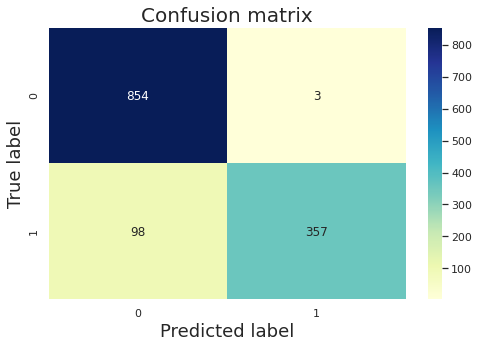

In [40]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [42]:
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('TP = ', TP)

TN =  854
FP =  3
FN =  98
TP =  357


In [30]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 47  13   0   0   0   0   0   0   0   0   0   0   0   0  14]
 [  7  42   5   0   0   0   0   1   0   0   1   0   0   0   4]
 [  0  11   7   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   2  13]
 [  0   0   0   0  17   0   0   0   0   0   0   0   0   0  12]
 [  0   0   0   1   0   7   2   0   0   0   1   0   1   0   9]
 [  0   0   0   0   0   1   7   0   0   0   0   0   0   0  13]
 [  2   0   0   1   0   0   0  18   0   0   0   0   0   1  10]
 [  0   0   0   0   1   0   0   4  15   1   0   0   0   1   6]
 [  0   0   0   1   0   0   1   0   6   2   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0  19   0   0   2   5]
 [  0   0   0   0   0   0   0   2   0   0   1   4   0   0   3]
 [  0   0   0   1   0   0   0   0   0   0   0   0  15   5   2]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0  51   6]
 [  1   0   0   1   1   0   0   0   0   0   0   0   0   0 854]]
              precision    recall  f1-score   support


Text(0.5, 21.5, 'Predicted label')

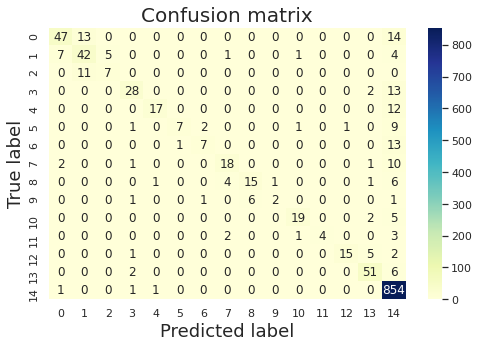

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)